In [1]:
#项目3-项目实训代码

#导入numpy库与拆分数据集的方法
import numpy as np
from sklearn.model_selection import train_test_split


#读取数据并将数据集进行分离，拆分为特征变量（data）与标签（target）
raw_df=np.loadtxt('logi-y.txt',delimiter=',',encoding='utf-8')
data=raw_df[:,0:2]                              #取数据的第0列和第1列（特征变量）
target=raw_df[:,2]                             #取数据的第2列（标签）
x,y=data,target                                #将特征变量（data）与标签（target）赋值给x和y

#将数据集拆分为训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=30) 


In [2]:
#导入逻辑回归模型与评估分类准确率的方法
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#建立与训练逻辑回归模型
model=LogisticRegression()	    #建立逻辑回归模型
model.fit(x_train,y_train)		#训练模型

#模型评估
ac=accuracy_score(y_test,model.predict(x_test))
print("模型预测正确率：",ac)

模型预测正确率： 0.8666666666666667


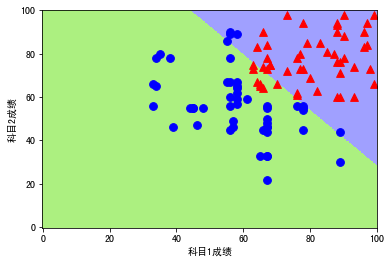

In [3]:
#导入Matplotlib库
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#绘制分类边界
N,M=500,500                  #网格采样点的个数，采样点越多，分类界面图越精细
t1=np.linspace(0,100,N)        #生成采样点的横坐标值
t2=np.linspace(0,100,M)        #生成采样点的纵坐标值
x1,x2=np.meshgrid(t1,t2)     #生成网格采样点
x_new=np.stack((x1.flat,x2.flat),axis=1)  #将采样点作为测试点
y_predict=model.predict(x_new)  #预测测试点的值
y_hat=y_predict.reshape(x1.shape) #与x1设置相同的形状
iris_cmap=ListedColormap(["#ACF080","#A0A0FF"])                   #设置分类界面的颜色
plt.pcolormesh(x1,x2,y_hat,cmap=iris_cmap)                         #绘制分类界面

#绘制样本点
plt.scatter(x[y==0,0],x[y==0,1],s=60,c='b',marker='o')	#绘制标签为0的样本点
plt.scatter(x[y==1,0],x[y==1,1],s=60,c='r',marker='^')	#绘制标签为1的样本点

#设置坐标轴的名称并显示图形
plt.xlabel('科目1成绩')						#图形横轴的标签名称
plt.ylabel('科目2成绩')						#图形纵轴的标签名称
plt.rcParams['font.sans-serif']='Simhei'	#中文文字设置为黑体
plt.show()							#显示图形
